<a href="https://colab.research.google.com/github/olcaykursun/ML/blob/main/Summer24/LinearRegression_with_Scikit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

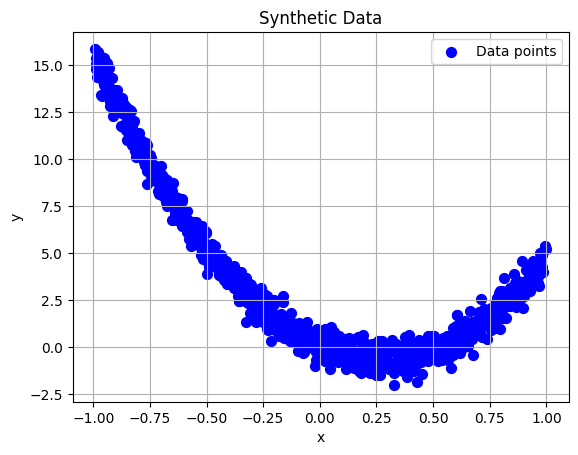

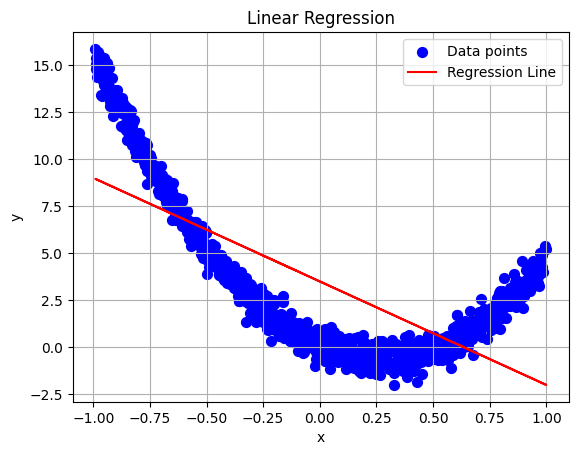

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
x = 2 * np.random.rand(n_samples) - 1  # Random x values between -1 and 1 (predictor)
#x = np.linspace(-1, 1, n_samples)

y = 10.1*x**2 - 5.3*x + 0.5*np.random.randn(n_samples)  # We want to predict y as a function of x

# Plot the generated data
plt.scatter(x, y, s=50, c='blue', label='Data points')
plt.title('Synthetic Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Start with Linear Regression
X = x.reshape(-1, 1)
reg = LinearRegression()
reg.fit(X, y)
y_pred = reg.predict(X)

# Plot the data along with the regression line
plt.scatter(x, y, s=50, c='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()


In [2]:
reg.intercept_+reg.coef_[0]*-0.6

6.7959149362174305

In [3]:
reg.predict([[-0.6],[+5]])

array([  6.79591494, -24.02405094])

Mean Squared Error: 9.268
Mean Squared Error: 9.268


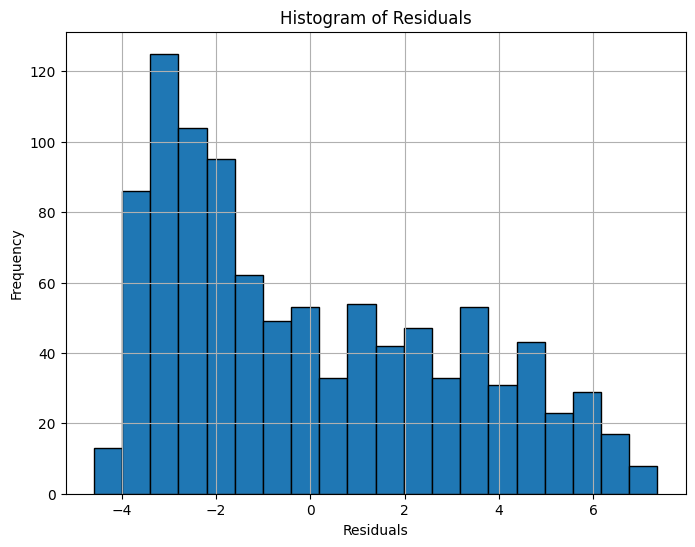

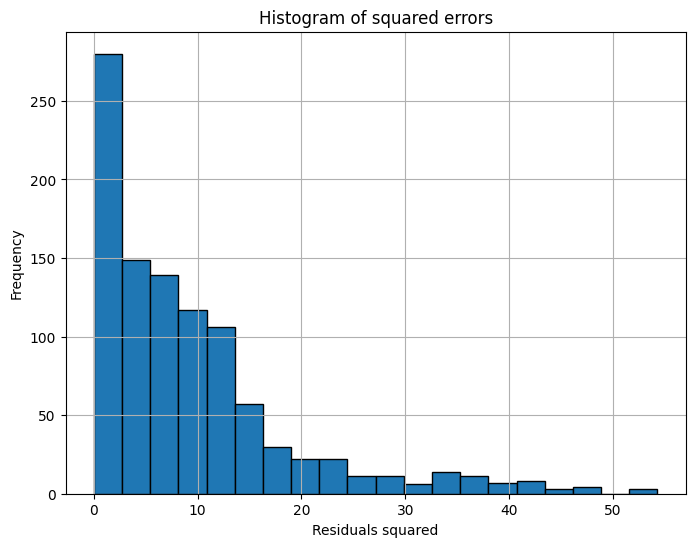

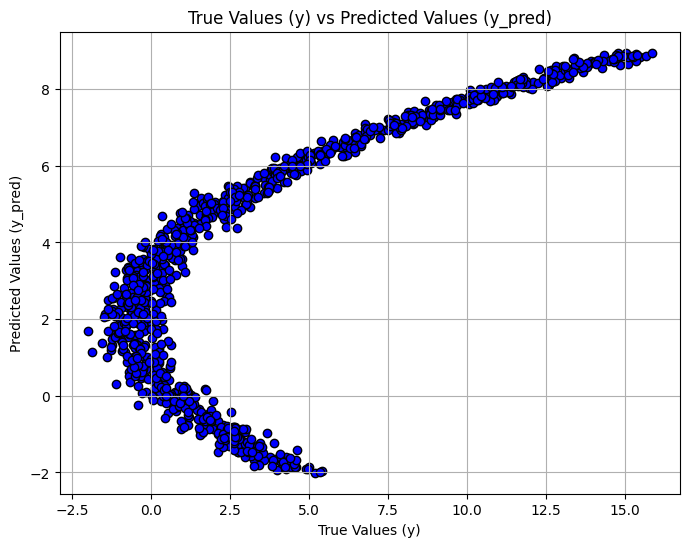

Correlation Coefficient (r): 0.73
Mean Squared Error: 9.27


In [4]:
# Calculate residuals and MSE
residuals = y - y_pred
print(f"Mean Squared Error: {np.mean(residuals**2):.3f}")

mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.3f}")

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram of squared errors
plt.figure(figsize=(8, 6))
plt.hist(residuals**2, bins=20, edgecolor='black')
plt.title('Histogram of squared errors')
plt.xlabel('Residuals squared')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot y vs y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, c='blue', edgecolor='k')
plt.title('True Values (y) vs Predicted Values (y_pred)')
plt.xlabel('True Values (y)')
plt.ylabel('Predicted Values (y_pred)')
plt.grid(True)
plt.show()

# Calculate correlation coefficient
corr_coef = np.corrcoef(y.flatten(), y_pred.flatten())[0, 1]
print(f"Correlation Coefficient (r): {corr_coef:.2f}")

# Calculate MSE
mse = mean_squared_error(y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")


In [5]:
corr_coef

0.7260028093927422

In [6]:
y.std(), mse**0.5  #it is a good idea to compare rmse with std to see how good the fit is

(4.426960717020544, 3.0443842910070535)

In [7]:
#Quick reminder about standard deviation:
# Calculate mean
mean_y = np.mean(y)
stddev = np.sqrt(np.mean((y-mean_y)**2))

# Calculate standard deviation
print(np.std(y), stddev)


4.426960717020544 4.426960717020544


In [8]:
# Calculate means

mean_y = np.mean(y)
mean_y_pred = np.mean(y_pred)

# Calculate standard deviations
std_y = np.std(y)
std_y_pred = np.std(y_pred)

# Calculate correlation coefficient (r)
covariance = np.mean((y - mean_y) * (y_pred - mean_y_pred))
corr_coef = covariance / (std_y * std_y_pred)

# Print results
print(f"Mean of y: {mean_y:.2f}")
print(f"Mean of y_pred: {mean_y_pred:.2f}")
print(f"Standard deviation of y: {std_y:.2f}")
print(f"Standard deviation of y_pred: {std_y_pred:.2f}")
print(f"Correlation Coefficient (r): {corr_coef:.5f}")


Mean of y: 3.60
Mean of y_pred: 3.60
Standard deviation of y: 4.43
Standard deviation of y_pred: 3.21
Correlation Coefficient (r): 0.72600


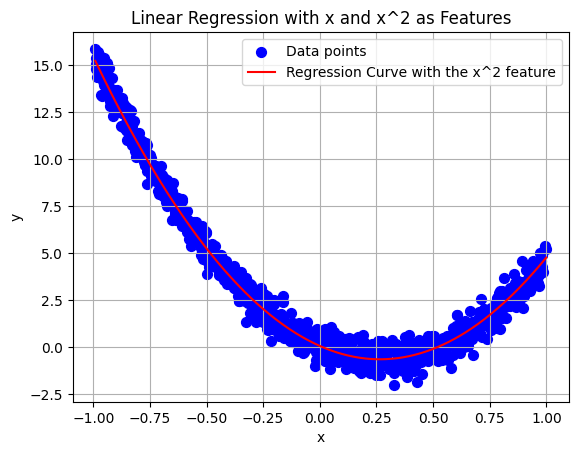

Mean Squared Error with x^2 feature: 0.243


In [9]:
# Create a new feature matrix including x and x^2
X = np.hstack(((x**2)[:, np.newaxis], x[:, np.newaxis]))

# Fit a linear regression model using x and x^2 as features
reg_poly = LinearRegression()
reg_poly.fit(X, y)
y_pred_poly = reg_poly.predict(X)

# Plot the data along with the regression curve
plt.scatter(x, y, s=50, c='blue', label='Data points')
sorted_order = np.argsort(x)
plt.plot(x[sorted_order], y_pred_poly[sorted_order], color='red', label='Regression Curve with the x^2 feature')
plt.title('Linear Regression with x and x^2 as Features')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()
plt.show()

# Calculate MSE
mse_poly = mean_squared_error(y, y_pred_poly)
print(f"Mean Squared Error with x^2 feature: {mse_poly:.3f}")


In [10]:
reg_poly.coef_, reg_poly.intercept_

(array([10.04258023, -5.33963359]), 0.06827956328874407)